# Suman Roy
## MDS202041


In [2]:
import numpy as np
import os
import cv2
import time
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

### Ques 1.c

In [3]:
def strip_image(strip_width = 2, img_shape = (200,200)):
    img = np.zeros(img_shape)
    M,N = img.shape
    strip = 'white'
    for j in range(0, N, strip_width):
        if strip=='black':
            img[:,j:(j+strip_width)] = 0
            strip = 'white'
        else:
            img[:,j:(j+strip_width)] = 255
            strip = 'black'
        
    return img

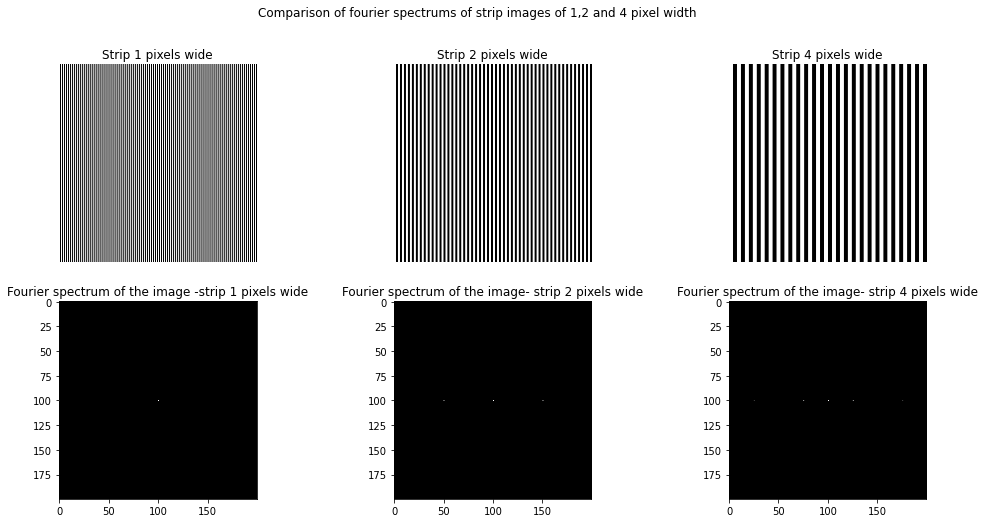

In [7]:
strip1 = strip_image(strip_width = 1)
strip1_fft =  np.fft.fftshift(np.fft.fft2(strip1))
mag_spec_1 = np.abs(strip1_fft)

strip2 = strip_image()
strip2_fft =  np.fft.fftshift(np.fft.fft2(strip2))
mag_spec_2 = np.abs(strip2_fft)

strip4 = strip_image(strip_width = 4)
strip4_fft =  np.fft.fftshift(np.fft.fft2(strip4))
mag_spec_4 = np.abs(strip4_fft)

fig, axs = plt.subplots(2,3, figsize = (17,8))

axs[0,0].imshow(strip1, cmap = 'gray')
axs[0,0].set_title("Strip 1 pixels wide")
axs[0,0].axis('off')
axs[1,0].imshow(mag_spec_1, cmap = 'gray')
axs[1,0].set_title("Fourier spectrum of the image -strip 1 pixels wide")


axs[0,1].imshow(strip2, cmap = 'gray')
axs[0,1].set_title("Strip 2 pixels wide")
axs[0,1].axis('off')
axs[1,1].imshow(mag_spec_2, cmap = 'gray')
axs[1,1].set_title("Fourier spectrum of the image- strip 2 pixels wide")


axs[0,2].imshow(strip4, cmap = 'gray')
axs[0,2].set_title("Strip 4 pixels wide")
axs[0,2].axis('off')
axs[1,2].imshow(mag_spec_4, cmap = 'gray')
axs[1,2].set_title("Fourier spectrum of the image- strip 4 pixels wide")

plt.suptitle("Comparison of fourier spectrums of strip images of 1,2 and 4 pixel width")
plt.show()

In [6]:
M,N = strip2.shape
mag_spec_1[M//2, N//2], mag_spec_4[M//2, N//2]

(5100000.0, 5100000.0)



4.21(a).   The image (with stripes 4 pixels wide) and its respective Fourier Transform has been shown in the above plot(subplot (1,3) and (2,,3)). 

4.21(b).   If we look at the spectrum, Components of the spectrum are only available in the horizontal axis. The reason might be so that the intensity of pixel values change only horizontally from one strip to another. The vertical change in frequency is zero.

4.21(c).   Refer to subplot (1,1) and (1,2).

4.21(d).   We cans ee that the DC terms in both a) and c) are same. The central DC component is the average brightness of the image which is the same for both. That's why this is noticed.  



### Ques 2

In [3]:
def box_filter(img,filter_m, filter_n):
    kernel = np.ones((filter_m, filter_n))
    kernel = kernel/(filter_m * filter_n)
    kernel = kernel.astype(np.float32)
    return (cv2.filter2D(img,-1,kernel))

In [4]:
def gaussian_kernel(img, size, std):
    a = cv2.getGaussianKernel(ksize = size, sigma = std)
    kernel = a * a.T
    return (cv2.filter2D(img, -1, kernel))

In [5]:
def laplacian_filter(img):
    kernel = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])
    return (cv2.filter2D(img, -1, kernel))

In [6]:
def sobel_filter(img, axis = 1):
    sobel_vertical= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

    sobel_horizontal= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
    
    if axis==1:
        #vertical edge detection
        kernel = sobel_vertical
    else:
        #horizontal edge detection
        kernel = sobel_horizontal   
    kernel = cv2.flip(kernel, -1) 
    return (cv2.filter2D(img, -1, kernel))

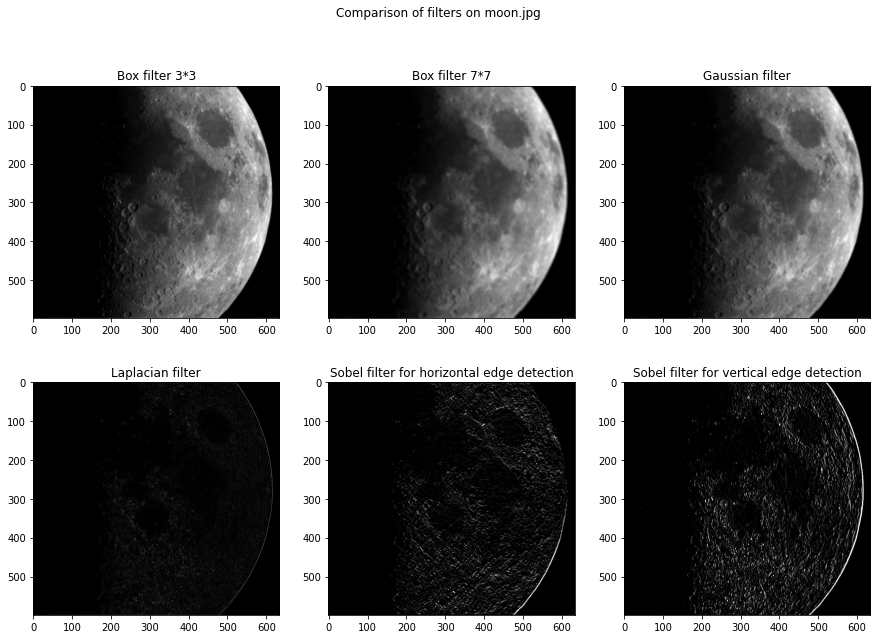

In [7]:
fig, axs = plt.subplots(2,3, figsize = (15, 10))

img_path = '/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/moon.jpg'
img = cv2.imread(img_path, 0)

box_3 = box_filter(img, 3, 3)
axs[0,0].imshow(box_3, cmap = 'gray')
axs[0,0].set_title("Box filter 3*3")

box_7 = box_filter(img, 7, 7)
axs[0,1].imshow(box_7, cmap = 'gray')
axs[0,1].set_title("Box filter 7*7")

gaussian = gaussian_kernel(img, 5, 10)
axs[0,2].imshow(gaussian, cmap = 'gray')
axs[0,2].set_title("Gaussian filter")

laplace = laplacian_filter(img)
axs[1,0].imshow(laplace, cmap = 'gray')
axs[1,0].set_title("Laplacian filter")

sobel_horizontal = sobel_filter(img,0)
axs[1,1].imshow(sobel_horizontal, cmap = 'gray')
axs[1,1].set_title("Sobel filter for horizontal edge detection")

sobel_vertical = sobel_filter(img,1)
axs[1,2].imshow(sobel_vertical, cmap = 'gray')
axs[1,2].set_title("Sobel filter for vertical edge detection")

plt.suptitle("Comparison of filters on moon.jpg")
plt.show()

### Ques 3

In [8]:
def create_rectangle(rectangle_size):
    img = np.zeros((100,100), dtype = np.uint8)
    M,N = img.shape    
    m,n = rectangle_size
    #creating the white rectangle
    img[(M//2 - m//2): (M//2+m//2), (N//2-n//2): (N//2+n//2)] = 255 
    
    return img

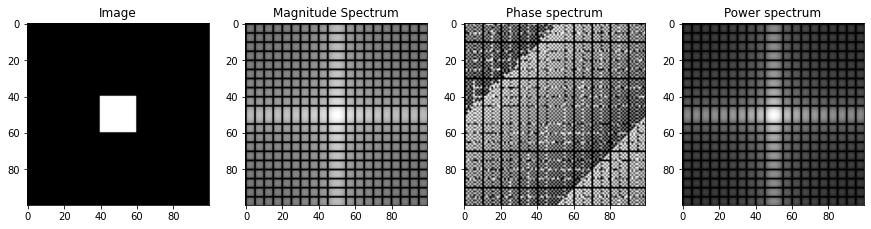

In [9]:
fig, axs = plt.subplots(1,4, figsize = (15,6))
img = create_rectangle((20,20))
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

magnitude_spectrum = 20 * np.log(1+magnitude_spectrum)
power_spectrum = np.power(magnitude_spectrum,2) 

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Image")
axs[1].imshow(magnitude_spectrum, cmap = 'gray')
axs[1].set_title("Magnitude Spectrum")
axs[2].imshow(phase_spectrum, cmap = 'gray')
axs[2].set_title("Phase spectrum")
axs[3].imshow(power_spectrum, cmap = 'gray')
axs[3].set_title("Power spectrum")


plt.show()

### Ques 4.a

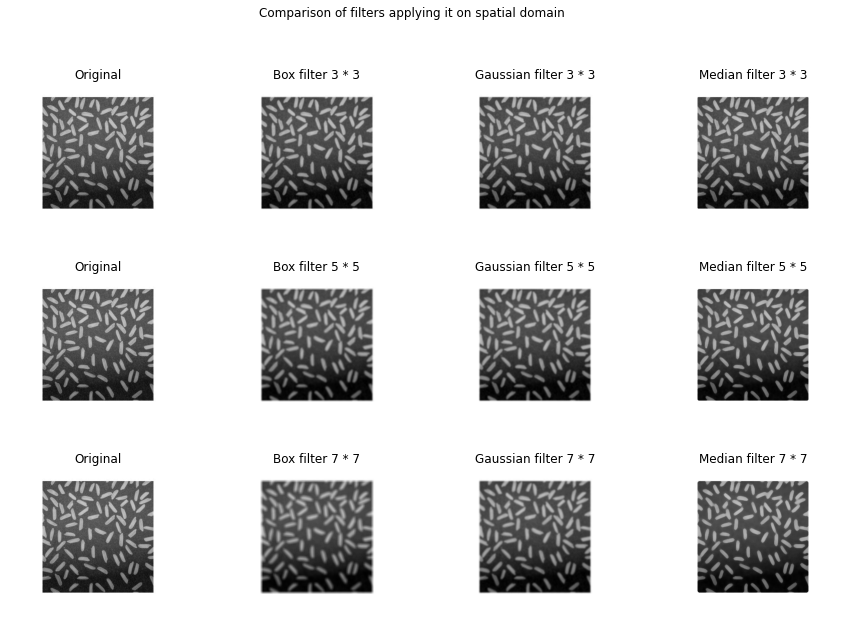

In [10]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/ricegrains.jpg', 0)

fig, axs = plt.subplots(3, 4, figsize = (15,10))
kernel_size = [3,5,7]

for i in range(3):
    k = kernel_size[i]
    
    box = cv2.blur(img , (k,k))
    gaussian = cv2.GaussianBlur(img, (k,k), 1.5)
    median = cv2.medianBlur(img, k)
    
    axs[i,0].imshow(img, cmap ='gray')
    axs[i,0].set_title("Original")
    axs[i,0].axis('off')
    
    axs[i,1].imshow(box, cmap = 'gray')
    axs[i,1].set_title("Box filter {} * {}".format(k,k))
    axs[i,1].axis('off')
    
    axs[i,2].imshow(gaussian, cmap = 'gray')
    axs[i,2].set_title("Gaussian filter {} * {}".format(k,k))
    axs[i,2].axis('off')
    
    axs[i,3].imshow(median, cmap ='gray')
    axs[i,3].set_title("Median filter {} * {}".format(k,k))
    axs[i,3].axis('off')
    
plt.suptitle("Comparison of filters applying it on spatial domain")
plt.show()

### Ques 4.b

In [12]:
def gaussian_lpf(img, radius):
    
    fshift = np.fft.fftshift(np.fft.fft2(img))
    
    M,N = img.shape
    output = np.zeros((M,N))
    X = np.zeros((M,N))

    a = round(M/2)
    b = round(N/2)   
    
    for i in range(M):
        for j in range(N):
            d = (i-a)**2 + (j-b)**2
            X[i,j] = np.exp(-(d/(2*(radius**2))))
            
    out_fourier = fshift * X
    output = np.abs(np.fft.ifft2(out_fourier))
    
    output = output.astype(np.uint8)
    
    return output

In [11]:
def butterworth_lpf(img, radius, n):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    output = np.zeros((M,N))
    
    a = round(M/2)
    b = round(N/2)
    
    X= np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = np.sqrt((i-a)**2 + (j-b)**2)
            X[i,j] = 1/(1+((d/radius)**(2*n)))
            
    out_fourier = fshift * X
    output = np.abs(np.fft.ifft2(out_fourier))
    
    #output = output.astype(np.uint8)
    
    return output

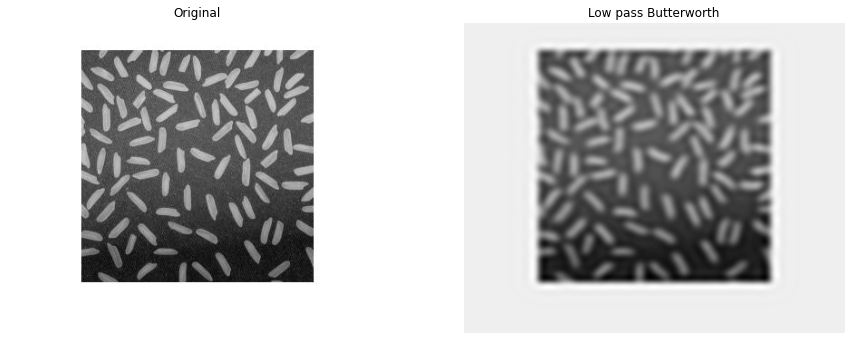

In [13]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/ricegrains.jpg',0)
img2 = butterworth_lpf(img, radius = 30,n=4)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("Low pass Butterworth")
axs[1].axis('off')

plt.show()

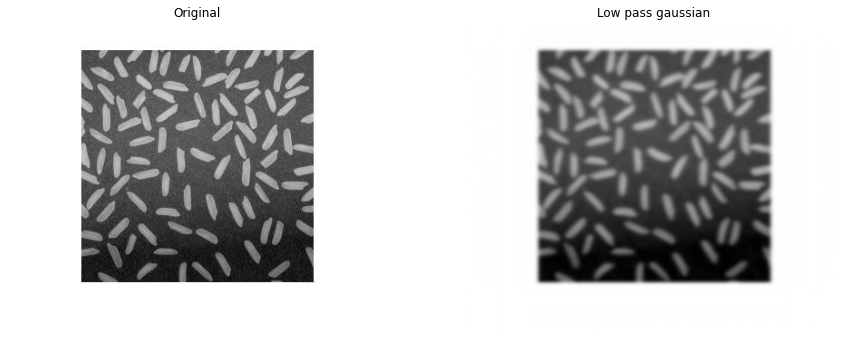

In [14]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/ricegrains.jpg',0)
img2 = gaussian_lpf(img, radius = 30)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("Low pass gaussian")
axs[1].axis('off')

plt.show()

### Ques 5.a

**Sobel Edge Detector**

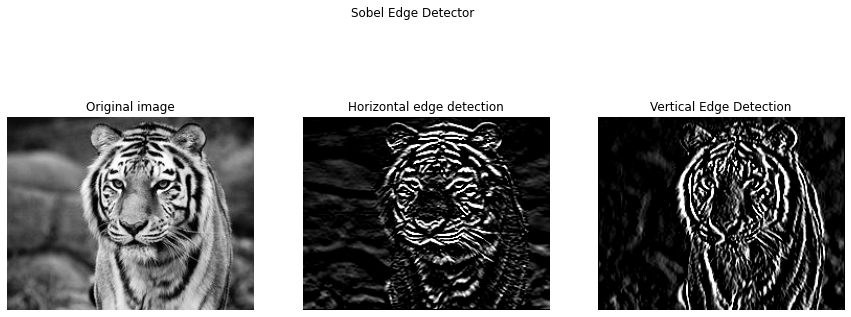

In [17]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/tigerbw.jpg',0)
sobel_horizontal = sobel_filter(img,0)
sobel_vertical = sobel_filter(img,1)

fig, axs = plt.subplots(1,3, figsize = (15,6))

axs[0].imshow(img, cmap  ='gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(sobel_horizontal, cmap  ='gray')
axs[1].set_title("Horizontal edge detection")
axs[1].axis('off')
axs[2].imshow(sobel_vertical, cmap  ='gray')
axs[2].set_title("Vertical Edge Detection")
axs[2].axis('off')
plt.suptitle("Sobel Edge Detector")
plt.show()

**Unsharp Masking**

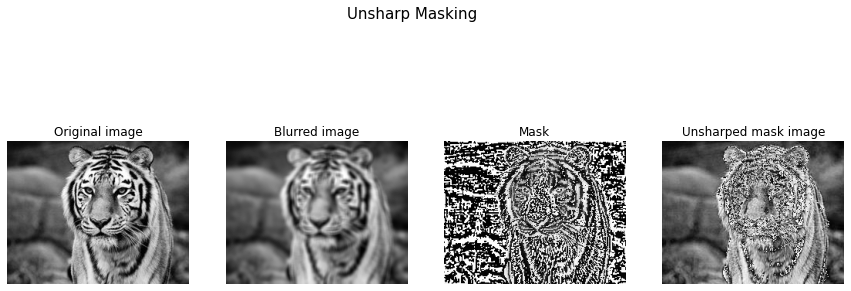

In [19]:
N = 1
x = cv2.getGaussianKernel(ksize = 5, sigma = 10)
kernel = x * x.T

blurred = cv2.filter2D(img, -1, kernel)

mask = img - blurred

unsharped = img + N*mask

fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap  ='gray')
axs[0].set_title("Original image")
axs[0].axis('off')
axs[1].imshow(blurred, cmap  ='gray')
axs[1].set_title("Blurred image")
axs[1].axis('off')
axs[2].imshow(mask, cmap  ='gray')
axs[2].set_title("Mask")
axs[2].axis('off')
axs[3].imshow(unsharped, cmap  ='gray')
axs[3].set_title("Unsharped mask image")
axs[3].axis('off')
plt.suptitle("Unsharp Masking", fontsize = 15)

plt.show()

**Laplace Edge Detector**

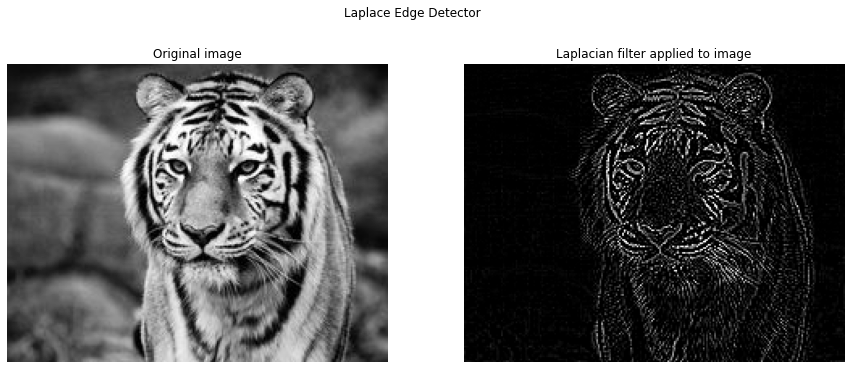

In [21]:
img_out = laplacian_filter(img)

fig, axs = plt.subplots(1,2, figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")
axs[0].axis('off')

axs[1].imshow(img_out, cmap = 'gray')
axs[1].set_title("Laplacian filter applied to image")
axs[1].axis('off')
plt.suptitle("Laplace Edge Detector")
plt.show()

### Ques 5.b

**Butterworth High Pass filter**

In [22]:
def butterworth_hpf(img, radius, n):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    output = np.zeros((M,N))
    
    a = round(M/2)
    b = round(N/2)
    
    X = np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = np.sqrt((i-a)**2 + (j-b)**2)
            X[i,j] = 1/(1+((d/radius)**(2*n)))
    
    X = (1 - X)
    
    out_fourier = fshift * X
    output = np.abs(np.fft.ifft2(out_fourier))

    return output

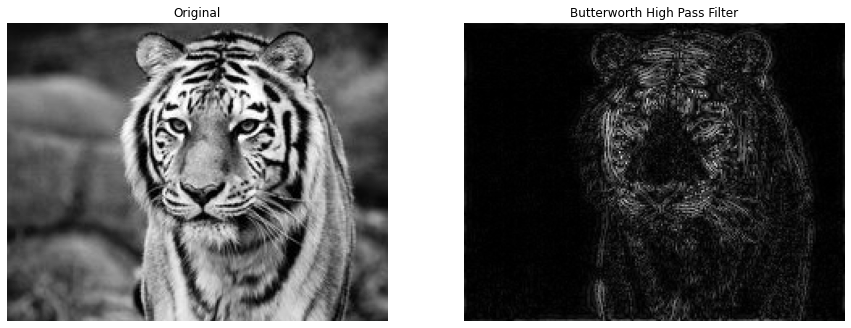

In [24]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/tigerbw.jpg',0)
img2 = butterworth_hpf(img, radius = 30, n = 4)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")
axs[0].axis('off')
axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("Butterworth High Pass Filter")
axs[1].axis('off')
plt.show()

**Gaussian High Pass Filter**

In [25]:
def gaussian_hpf(img, radius):
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    M,N = img.shape
    output = np.zeros((M,N))
    
    a = round(M/2)
    b = round(N/2)
    
    X = np.zeros((M,N))
    
    for i in range(M):
        for j in range(N):
            d = (i-a)**2 + (j-b)**2
            X[i,j] = np.exp(-(d/(2*(radius**2))))
    
    X = 1 - X
    out_fourier = fshift * X
    output = np.abs(np.fft.ifft2(out_fourier))
    output = output.astype(np.uint8)
    return output

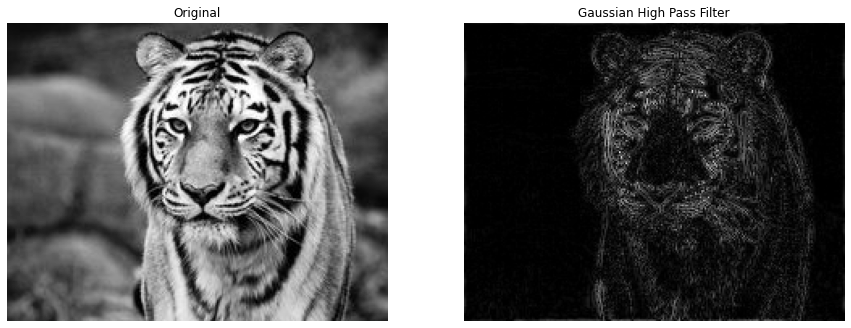

In [27]:
img2 = gaussian_hpf(img, radius = 30)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original")
axs[0].axis('off')
axs[1].imshow(img2, cmap = 'gray')
axs[1].set_title("Gaussian High Pass Filter")
axs[1].axis('off')
plt.show()

### Ques 6.a

Time taken in spatial domain = 0.010521 seconds


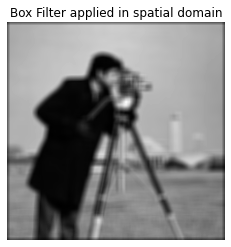

In [54]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 5/Filtering/cameraman.jpg',0)

size = 7
box_filter = (1/(size*size))*np.ones((size,size))
box_filter = box_filter.astype(np.float32)



start= time.time()
filter_spatial = convolve2d(img, box_filter, 'same')
end = time.time()

print ("Time taken in spatial domain = %f seconds" %(end - start))

plt.imshow(filter_spatial, cmap = 'gray')
plt.title("Box Filter applied in spatial domain")
plt.axis('off')
plt.show()

### Ques 6.b

In [46]:
def padding(img, shape_2):
    M,N = img.shape
    
    new_M, new_N = shape_2
    
    out_img = np.zeros((new_M, new_N))
    
    out_img[:M,:N] = img
    
    return out_img

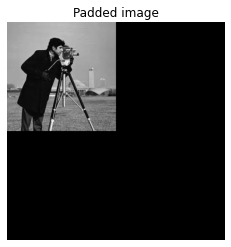

In [47]:
M, N = img.shape
P = 2*M
Q = 2*N
out_img = padding(img, (P,Q))
plt.imshow(out_img, cmap = 'gray')
plt.title("Padded image")
plt.axis('off')
plt.show()

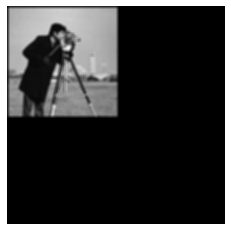

In [48]:
pad_filter = padding(box_filter, (P,Q))
image_fft =  np.fft.fftshift(np.fft.fft2(out_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(pad_filter))

start = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end = time.time()

transformed_spatial = np.abs(np.fft.ifft2(conv_fourier))

transformed_spatial = transformed_spatial.astype(np.uint8)

plt.imshow(transformed_spatial, cmap ='gray')
plt.axis('off')
plt.show()

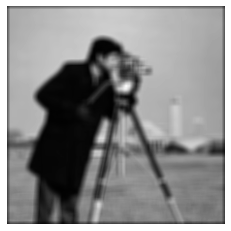

In [49]:
transformed_spatial2 = transformed_spatial[3:3+M,3:3+N]
plt.imshow(transformed_spatial2, cmap = 'gray')
plt.axis('off')
plt.show()

In [50]:
print ("Time taken for frequency domain = %f" %(end - start))

Time taken for frequency domain = 0.000918


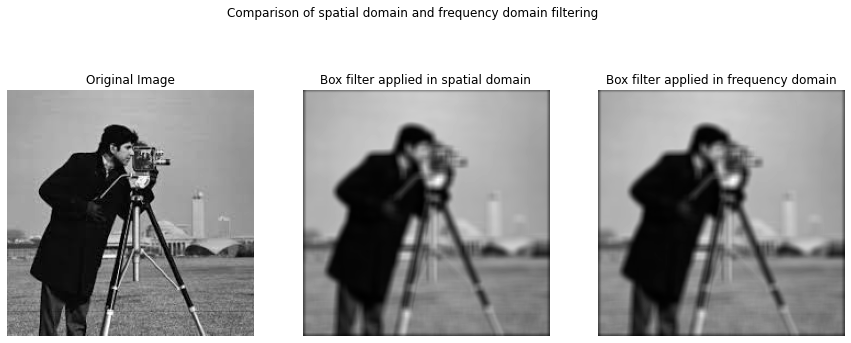

In [53]:
fig, axs = plt.subplots(1,3, figsize= (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(filter_spatial, cmap = 'gray')
axs[1].set_title("Box filter applied in spatial domain")
axs[1].axis('off')
axs[2].imshow(transformed_spatial2, cmap ='gray')
axs[2].set_title("Box filter applied in frequency domain")
axs[2].axis('off')
plt.suptitle("Comparison of spatial domain and frequency domain filtering")
plt.show()

### Ques 6.c

**Time taken for spatial domain = 0.010521 seconds.**
**Time taken for frequency domain = 0.000918 seconds.**

So, Frequency domain operation is almost 10 times faster. 